In [1]:
from vaiutils import path_consts, plot_images, summarize_tensor
from scipy.misc import imread
from scipy.linalg import norm
from glob import glob

In [2]:
for k, v in path_consts('StateFarm'):
    exec(k + '=v')

In [3]:
def spherical_space(tensor):
    assert tensor.shape[-1] == 3
    epsilon = 1e-9

    x, y, z = np.take(tensor, 0, axis=-1), np.take(tensor, 1,
                                                   axis=-1), np.take(tensor, 2, axis=-1)
    r = norm(tensor, axis=-1)
    theta = np.arccos(z / (r + epsilon))
    phi = np.arctan(y / (x + epsilon))
    return np.stack([r, theta, phi], -1)


def cart_space(tensor):
    assert tensor.shape[-1] == 3

    r, theta, phi = np.take(
        tensor, 0, axis=-1), np.take(tensor, 1, axis=-1), np.take(tensor, 2, axis=-1)
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return np.stack([x, y, z], -1)

In [4]:
filenames = glob(DIR_DATA + '/test/unknown/*.jpg')

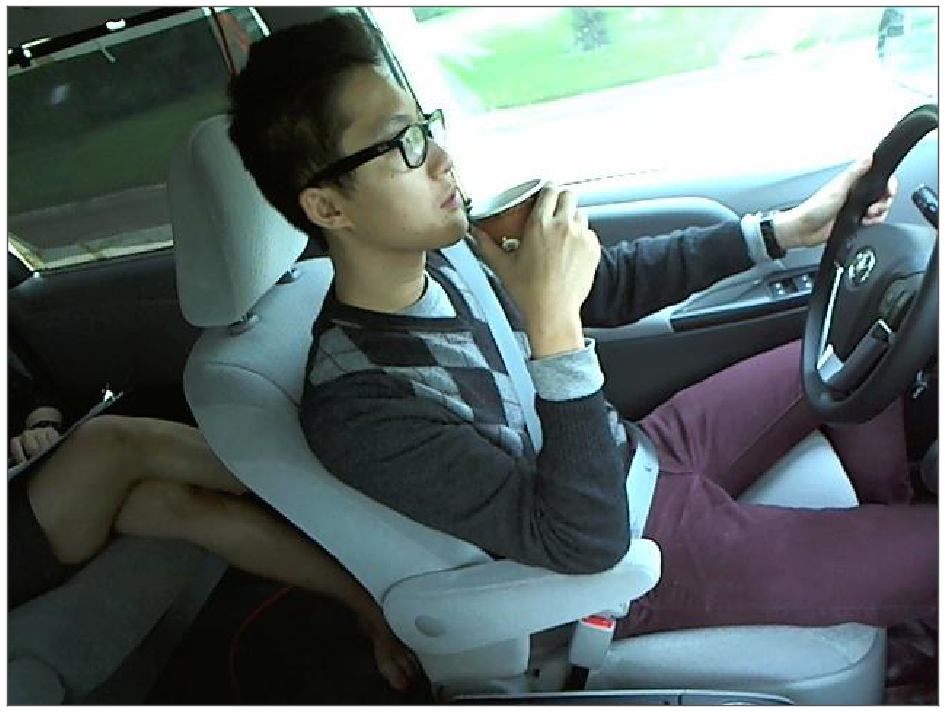

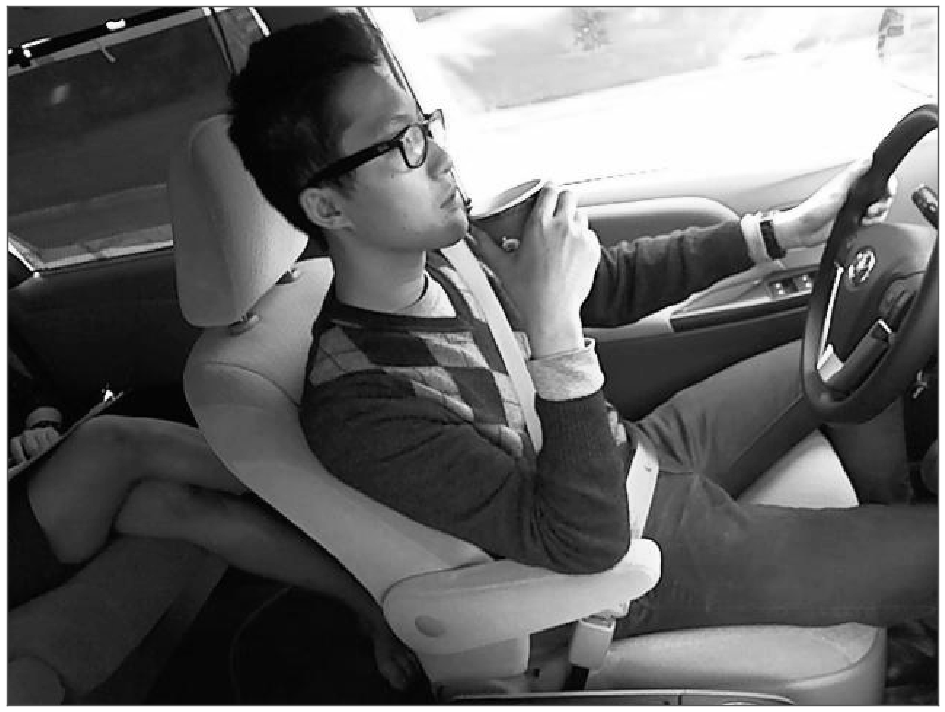

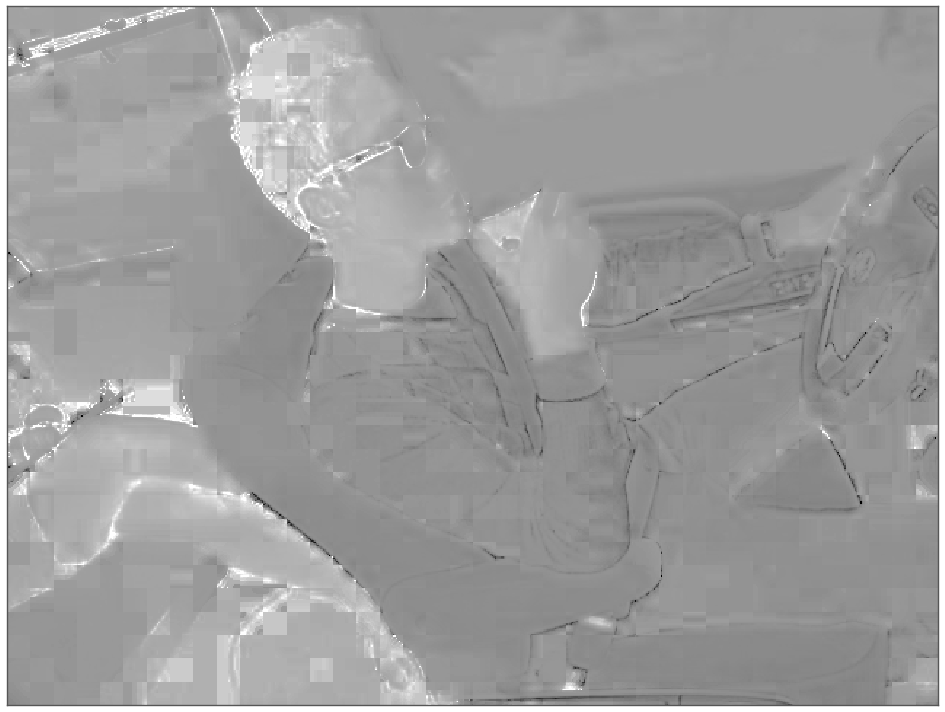

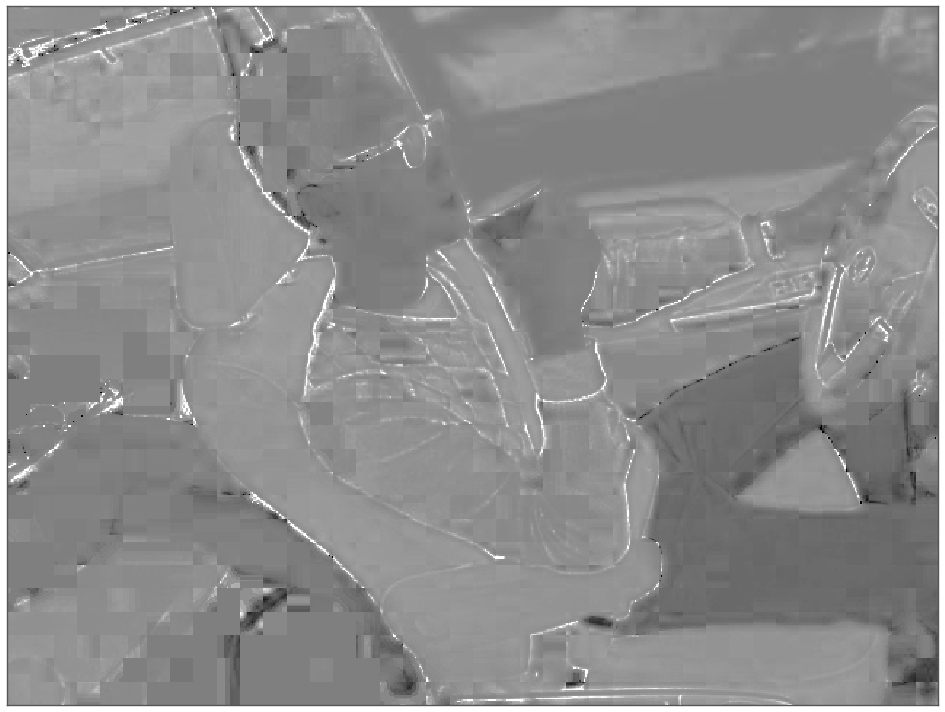

In [8]:
img = imread(filenames[randint(len(filenames))])
sph_img = spherical_space(img)
plot_images([img], pixel_range=(0, 255))
plot_images([sph_img[:, :, 0]], pixel_range=(0, np.sqrt(3)*255))
plot_images([sph_img[:, :, 1]], pixel_range=(0, np.pi/2))
plot_images([sph_img[:, :, 2]], pixel_range=(0, np.pi/2))

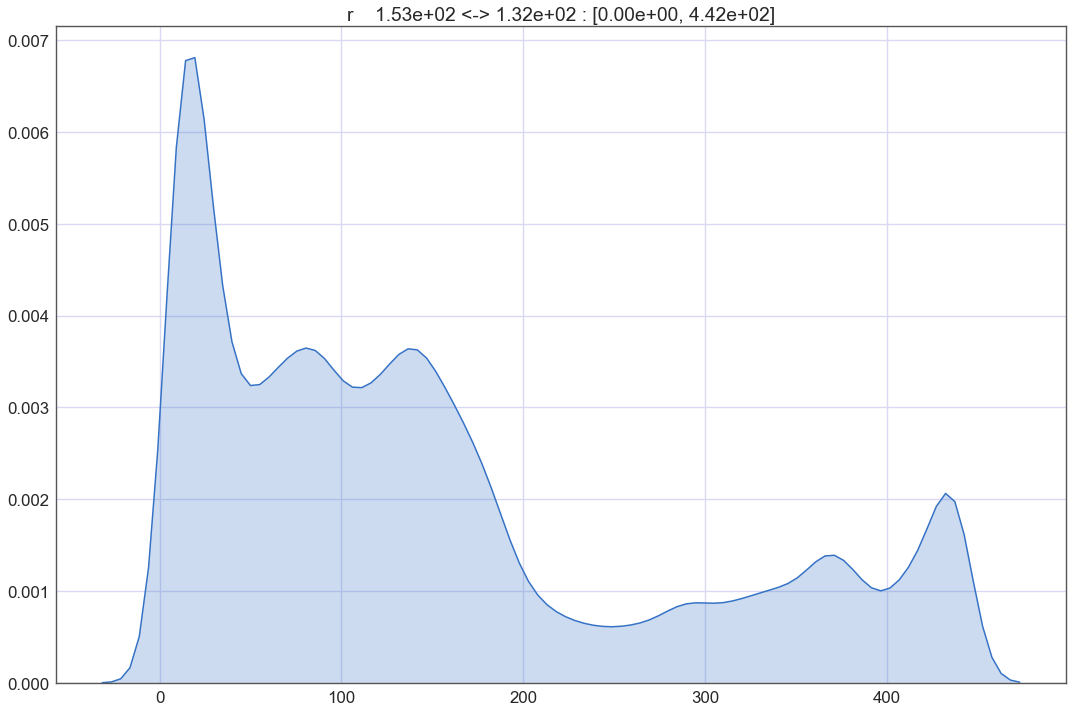

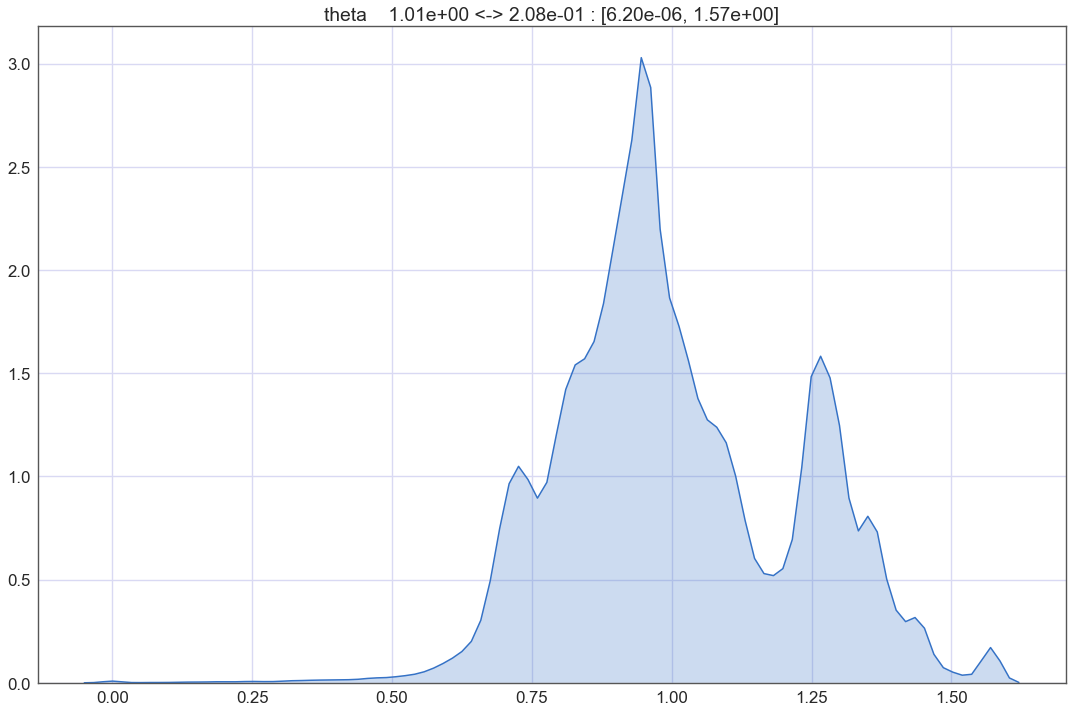

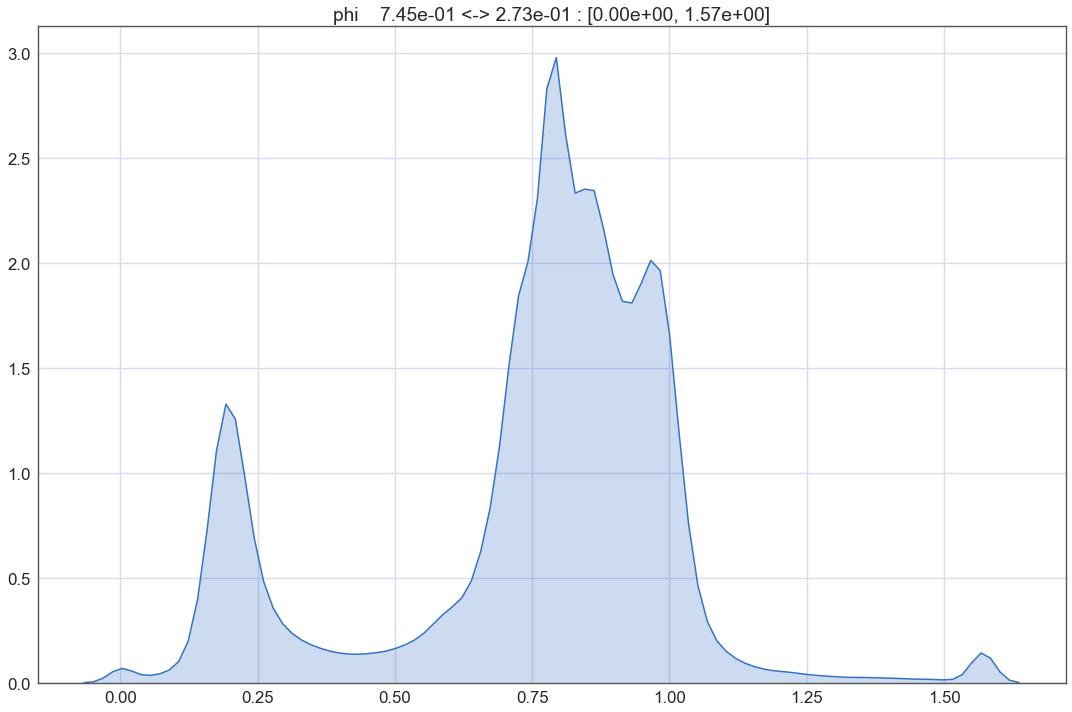

In [91]:
summarize_tensor(sph_img[:,:,0],'r')
plt.show()
summarize_tensor(sph_img[:,:,1], 'theta')
plt.show()
summarize_tensor(sph_img[:,:,2], 'phi')